In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
os.environ["PYTHONHASHSEED"] = "42"
codetrace = "/home/franlucc/projects/codetrace"
os.environ["PYTHONPATH"] = codetrace
sys.path.append(codetrace)
RESULTS_DIR="/mnt/ssd/franlucc/scratch/type-steering-results"
ANALYSIS_DIR=f"{codetrace}/codetrace/analysis/figures"

In [38]:
from codetrace.analysis.plot_fig_icl import _load, compare_icl, plot_icl
from codetrace.analysis.plot_fig_correlation import plot_correlation
from codetrace.analysis.plot_fig_all_models import _load as load_all_models, plot_all_models
from codetrace.analysis.plot_fig_layer_ablations import _load as load_layer_ablation, plot_all_layers
from codetrace.analysis.plot_fig_splits import _load as load_splits, plot_splits
from codetrace.analysis.plot_fig_lang_transfer import _load as load_lang_transfer, plot_lang_transfer
import pandas as pd

## Layer ablation

In [4]:
layer_df = load_layer_ablation(RESULTS_DIR, "starcoderbase-7b","py")

Loading from local: True


checking: 100%|██████████| 840/840 [00:04<00:00, 201.76it/s]


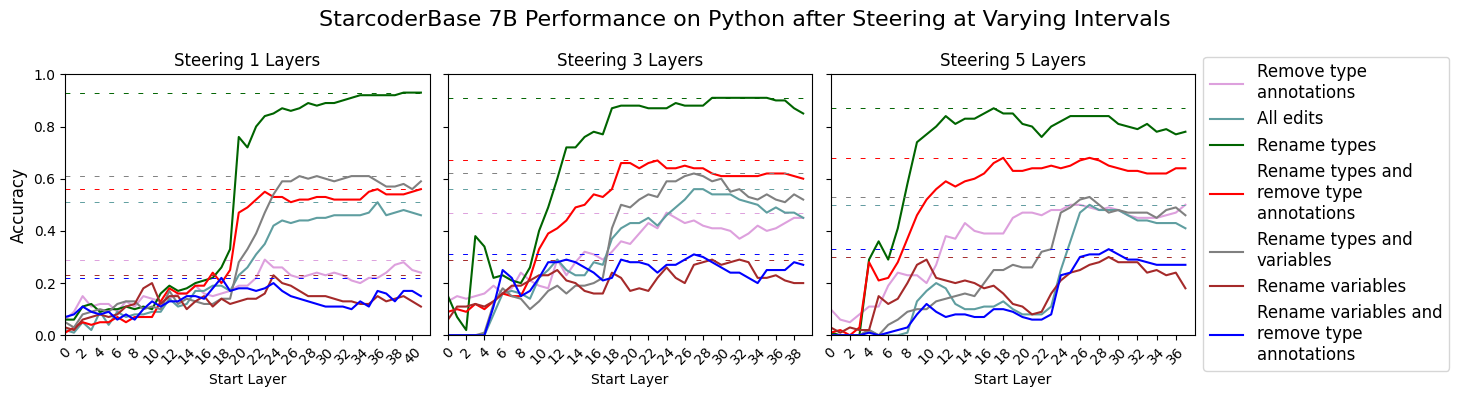

In [5]:
plot_all_layers(layer_df, ANALYSIS_DIR)

## All Models

In [6]:
model_df = load_all_models(RESULTS_DIR, "ts", 5)

Loading from local: True


models:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Test split Success Rate: 100%|██████████| 938/938 [00:07<00:00, 130.80it/s]


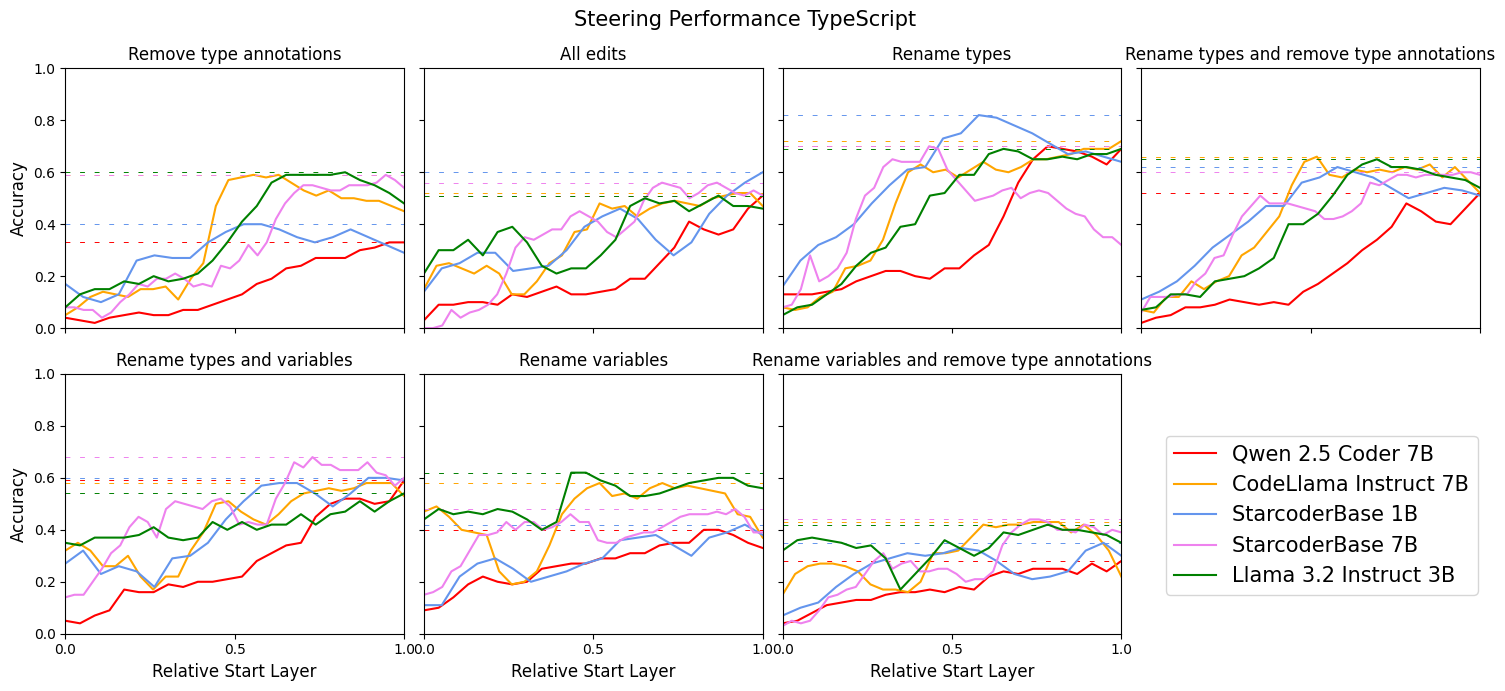

In [7]:
plot_all_models(model_df, ANALYSIS_DIR)

## Splits Ablation

In [8]:
splits_df = load_splits(RESULTS_DIR, "starcoderbase-7b","ts",5)

Loading from local: True


Checking splits: 100%|██████████| 266/266 [00:05<00:00, 45.04it/s]


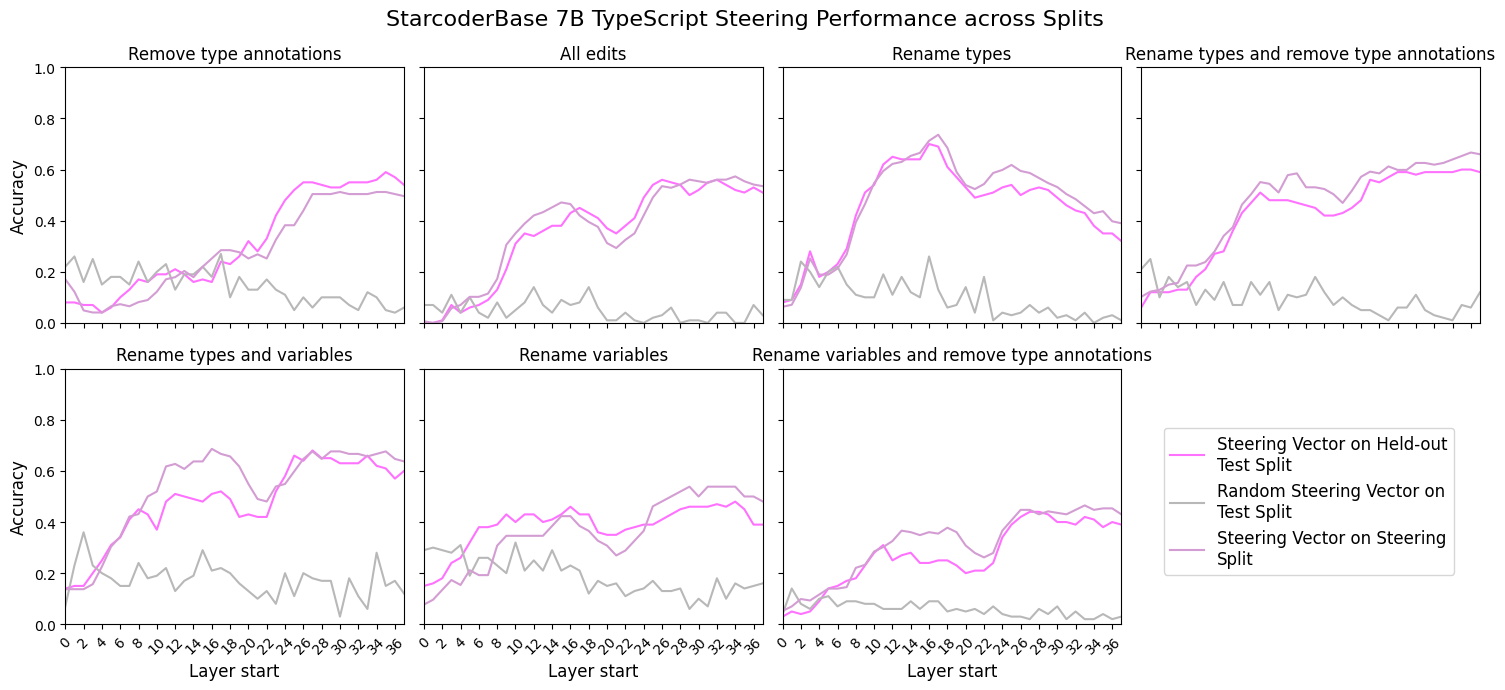

In [36]:
plot_splits(splits_df, ANALYSIS_DIR)

## ICL comparison

In [10]:
df_comp, df_icl_comp = _load(RESULTS_DIR, 5, f"{codetrace}/results")

Loading from local: True


Loading models data:   0%|          | 0/5 [00:00<?, ?it/s]

Loading Test Split Success: 100%|██████████| 1876/1876 [00:03<00:00, 598.20it/s] 


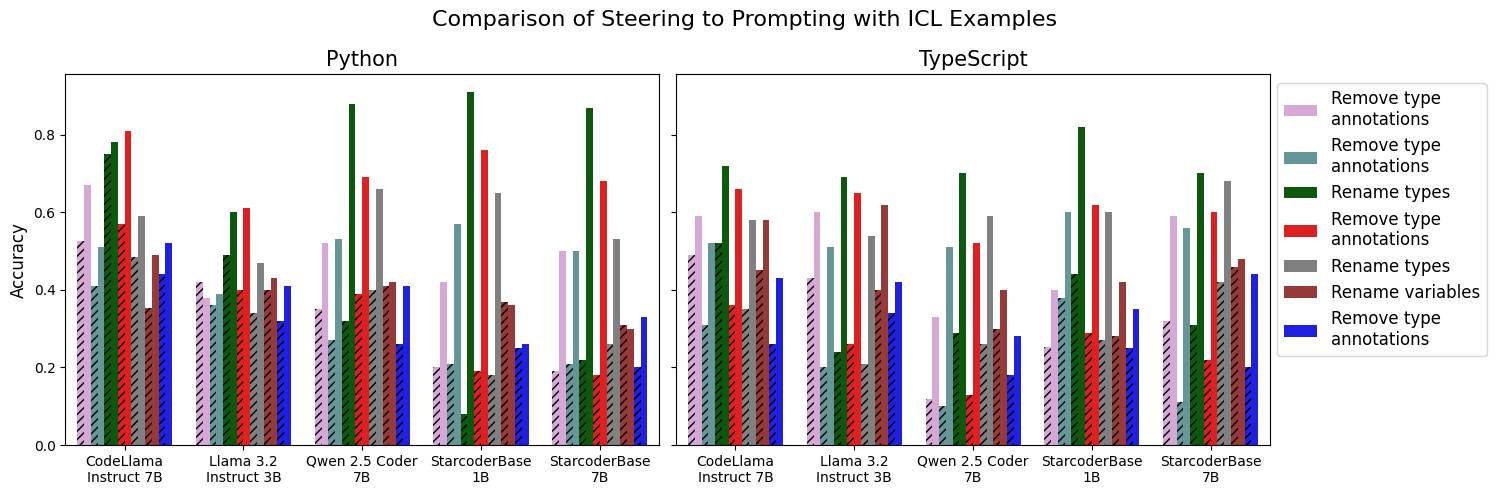

In [32]:
df = compare_icl(df_comp, df_icl_comp, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.csv")
plot_icl(df, f"{codetrace}/codetrace/analysis/figures/compare_icl-interval_5.pdf")


## Correlation

In [34]:
corr_df = pd.read_csv(f"{ANALYSIS_DIR}/correlation-interval_5.csv")

Correlation -0.6853154996008337 5.975447864212308e-11


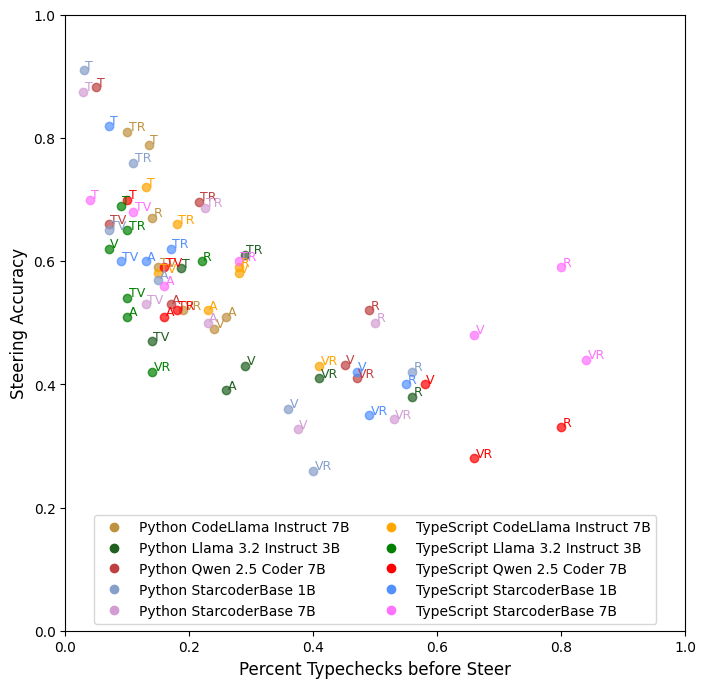

In [64]:
plot_correlation(corr_df, f"{ANALYSIS_DIR}/correlation-interval_5.pdf",False)

## Lang transfer

In [39]:
lang_transfer_df = load_lang_transfer(RESULTS_DIR, "qwen2p5_coder_7b_base", "py", 5)

Loading from local: True


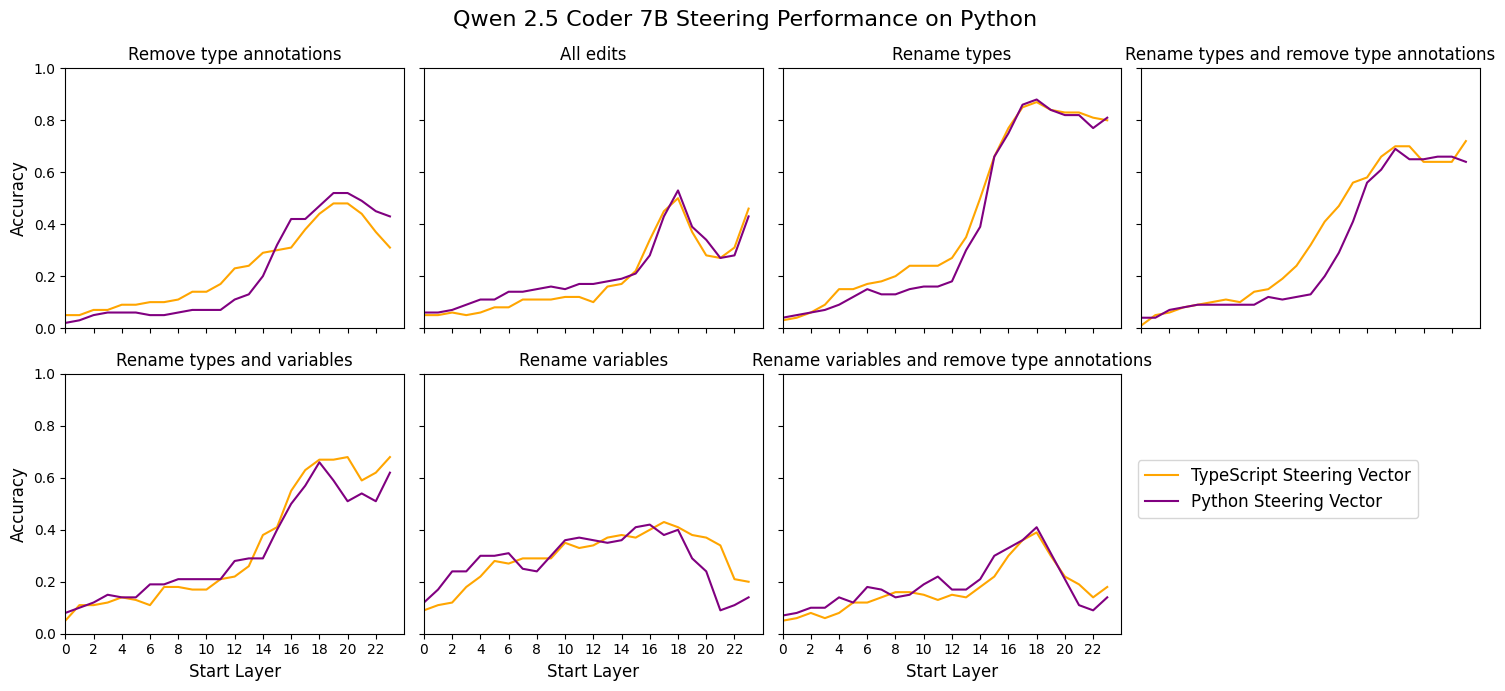

In [45]:
plot_lang_transfer(lang_transfer_df, ANALYSIS_DIR)